# [자전거 대여 수요 예측](https://www.kaggle.com/c/bike-sharing-demand)


## 탐색적 데이터 분석

### 데이터 둘러보기

In [ ]:
# 판다스로 훈련, 테스트, 제출 샘플 데이터를 DataFrame 형태로 불러오기

import numpy as np
import pandas as pd

data_path = '/content/drive/MyDrive/Kaggle/Bike_Sharing_Demand/data/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [ ]:
train.shape, test.shape

((10886, 12), (6493, 9))

테스트 데이터에 casual과 registered 피처가 존재하지 않으므로 모델을 훈련할 때 해당 피처를 제외한다.

In [ ]:
train.head() # 경진대회 Data에서 각 피처의 의미를 확인할 수 있음

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
# DataFrame 각 열의 결측값이 몇 개인지, 데이터 타입은 무엇인지 파악할 수 있다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### 더 효과적인 분석을 위한 피처 엔지니어링

데이터를 다양한 관점에서 시각화해보면 raw data 상태에서는 찾기 어려운 경향, 공통점, 차이 등을 찾을 수 있다. 하지만, datetime과 같은 일부 데이터는 시각화하기에 적합하지 않은 형태일 수도 있기 때문에 변환(피처 엔지니어링)을 해준다.

datetime -> 데이터 타입: object
- object 타입은 문자열 타입이라고 볼 수 있다.
- 연도, 월, 일, 시간, 분, 초로 구성되어 있기 때문에 세부적으로 분석하기 위해 구성요소별로 나누어본다.

In [ ]:
print(train['datetime'][100])
print(train['datetime'][100].split())
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[1])

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [ ]:
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[0].split('-'))
print(train['datetime'][100].split()[0].split('-')[0])
print(train['datetime'][100].split()[0].split('-')[1])
print(train['datetime'][100].split()[0].split('-')[2])

2011-01-05
['2011', '01', '05']
2011
01
05


In [ ]:
print(train['datetime'][100].split()[1])
print(train['datetime'][100].split()[1].split(':'))
print(train['datetime'][100].split()[1].split(':')[0])
print(train['datetime'][100].split()[1].split(':')[1])
print(train['datetime'][100].split()[1].split(':')[2])

09:00:00
['09', '00', '00']
09
00
00


apply() 함수는 DataFrame의 데이터를 일괄 가공해준다.

In [ ]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])

train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

calendar와 datetime 라이브러리를 활용해 요일 피처를 문자로 구할 수 있다.
- datetime: 날짜와 시간을 조작하는 라이브러리

In [ ]:
from datetime import datetime # datetime 라이브러리
import calendar

print(train['date'][100])
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경

# 정수로 요일 변환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())

# 문자열로 요일 변환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [ ]:
train['weekday'] = train['date'].apply(
    lambda dateString:
    calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()])

'season', 'weather' 피처의 경우 범주형 데이터로 이루어져있어 정확한 의미 파악이 힘들다. 시각화를 위해 의미가 잘 드러나도록 map() 함수를 사용하여 문자열로 변환한다.

In [ ]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})

train['weather'] = train['weather'].map({1: 'Claer',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunderstrom',
                                         4: 'Heavy Rain, Thunderstrom, Snow, Fog'})

- date 피처가 제공하는 정보는 모두 year, month, day 피처에 존재하므로 추후 제거
- 세 달씩 '월'을 묶으면 '계절'이 되므로, 지나친 세분화를 방지하기 위해 season 피처만 남기고 month 피처는 제거

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Claer,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Claer,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Claer,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Claer,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Claer,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


### 데이터 시각화

In [ ]:
# 라이브러리
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 그래프를 주피터 노트북에서 바로 출력하게 해준다.
%matplotlib inline

#### 분포도(distribution plot)
수치형 데이터의 집계 값을 나타내는 그래프(총 개수, 비율 등)

런타임 설정(rc, run-time configuration)
- matplotlib의 다양한 속성을 설정하거나 변경할 수 있다. 이러한 설정은 폰트 크기, 색상, 선 스타일, 그림 크기 등과 같은 플롯의 다양한 시각적 속성을 제어하는 데 사용된다.

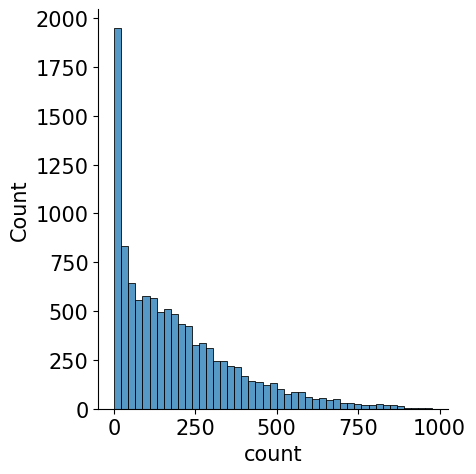

In [ ]:
# 타깃값의 분포를 확인하여, 훈련 시 타깃값을 그대로 사용할지 변환해 사용할지 파악한다.
mpl.rc('font', size=15) # 폰트 크기를 15로 설정
sns.displot(train['count']) # 분포도 출력

**분석**
- x축은 타깃값인 count, y축은 총 개수
- 타깃값을 확인했을 때, count가 0에 몰려있다. 즉, 분포가 왼쪽으로 많이 편향되어 있다.
- 회귀 모델의 경우 데이터가 정규분포에 따라야 좋은 성능을 보이므로, 현재 타깃값을 그대로 사용해 모델링을 진행한다면 좋은 성능을 기대하기 어렵다.

**접근방법**
- 로그변환
    - 데이터 분포를 정규분포에 가깝게 만들기 위해 많이 사용된다.
    - 데이터가 왼쪽으로 편향되어 있을 때 사용한다.
    - 간단하게 원하는 값에 로그를 취해준다.
    - 마지막에 지수변환을 하여 실제 타깃값인 count로 복원해야한다.

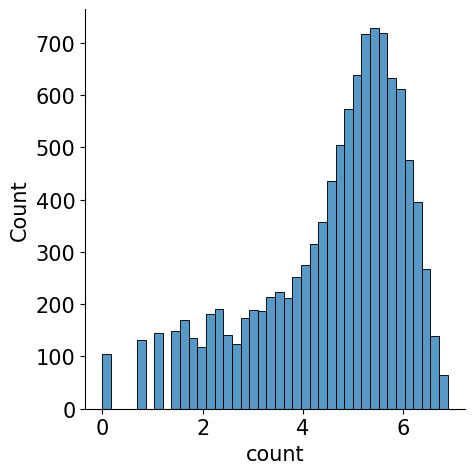

In [ ]:
sns.displot(np.log(train['count']))

#### 막대 그래프

**To-do**
- 연도, 월, 일, 시, 분, 초별로 총 여섯 가지의 평균 대여 수량을 막대 그래프로 그려본다.

**Why?**
- 해당 피처들은 범주형 데이터이므로, 각 범주형 데이터에 따라 평균 대여 수량이 어떻게 다른지 파악하여 중요한 피처를 파악하고자 한다.

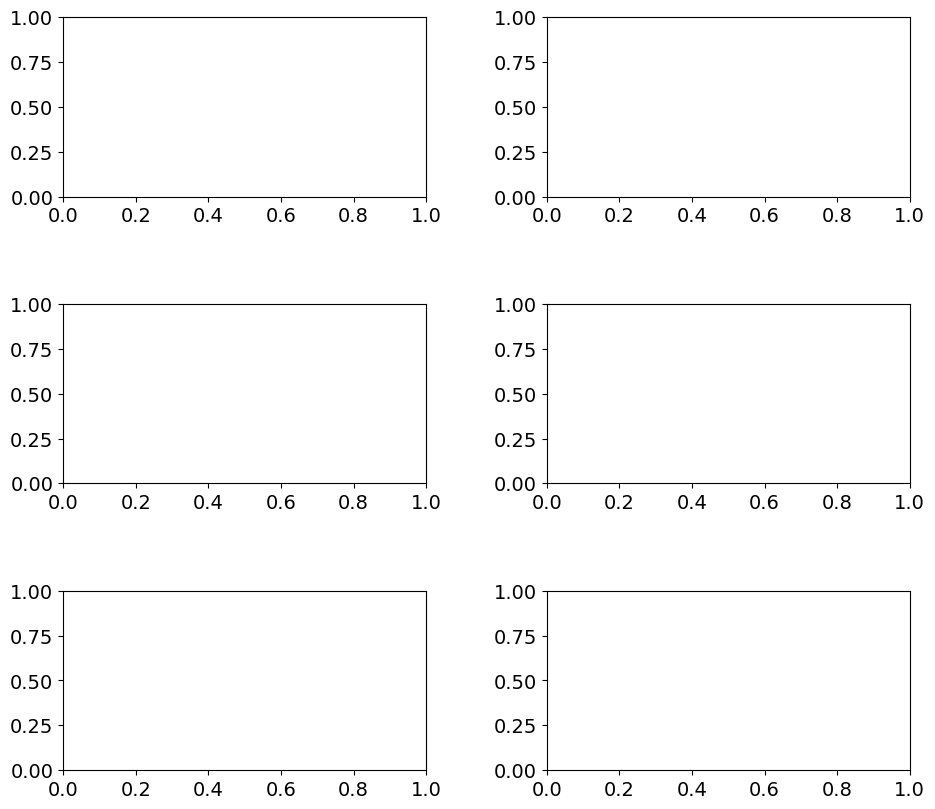

In [ ]:
# Step 1. m행 n열 Figure 준비
mpl.rc('font', size=14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정

figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10, 9) # 전체 figure 크기를 10x9인치로 설정

In [ ]:
# Step 2. 각 축에 서브플롯 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

<Axes: xlabel='second', ylabel='count'>

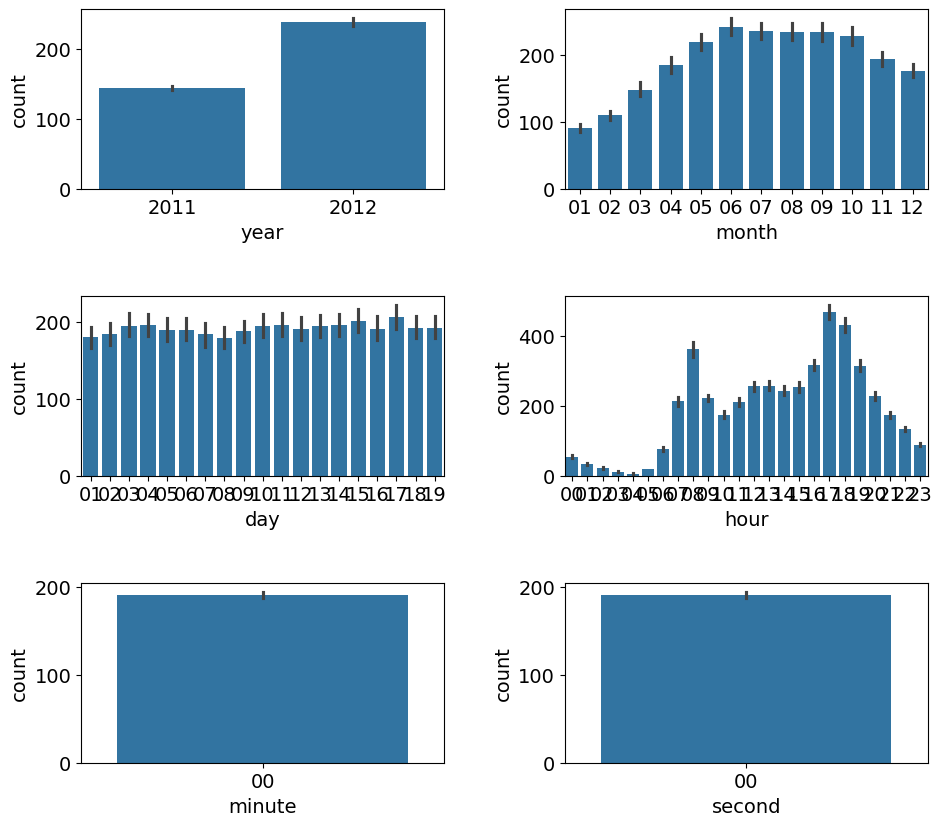

In [ ]:
figure

tick_params 함수는 labelrotation 외에도 너비, 색상 등 다양한 미세조정용 파라미터를 지원한다.

In [ ]:
# Step 3. 세부 설정

# Title 설정
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# x축 라벨 회전
axes[1, 0].tick_params(axis='x', labelrotation=90) # axis 기본값 = 'both'
axes[1, 1].tick_params(axis='x', labelrotation=90)

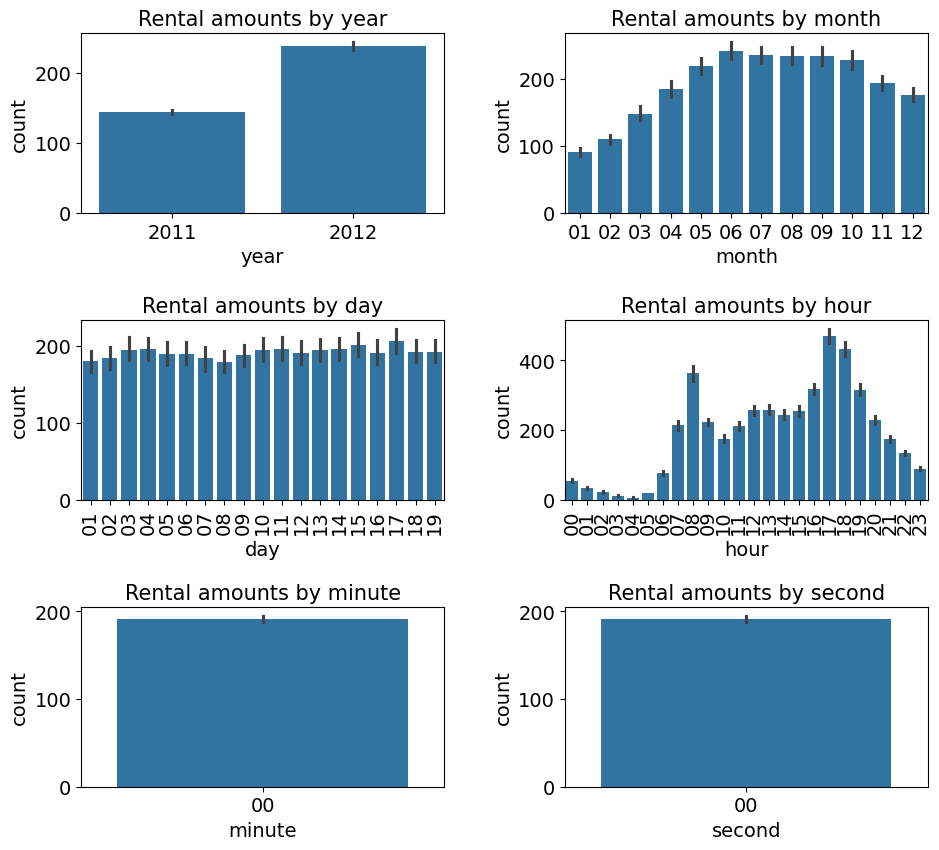

In [ ]:
figure

**분석**
- '연도별 평균 대여 수량'
    - 2012년에 대여가 더 많았다.
- '월별 평균 대여 수량'
    - 대여 수량이 6월에 가장 많고 1월에 가장 적음을 알 수 있다.
    - 날씨가 따듯할 때, 많이 대여한다고 짐작할 수 있다.
- '일별 평균 대여 수량'
    - 뚜렷한 차이가 없다. 훈련 데이터에서는 1일 ~ 19일까지의 데이터가 존재하고, 이후는 테스트 데이터에 존재한다. 따라서, day는 피처로 사용하지 못한다.
- '시간별 평균 대여 수량'
    - 새벽에 가장 적게 대여하고, 아침 8시, 저녁 5~6시에 대여가 가장 많다.
    - 등하교, 출퇴근 길에 많이 이용한다고 짐작할 수 있다.
- '분, 초별 평균 대여 수량'
    - 아무 정도를 담고 있지 않다.
    - 훈련 데이터에 분, 초는 모두 0으로 기록되어 있으므로, 모델 훈련시 해당 피처는 사용하지 않는다.

#### 박스플롯
범주형 데이터에 따른 수치형 데이터 정보를 나타내는 그래프

**To-do**
- 계절, 날씨, 공휴일, 근무일(범주형 데이터)별 대여 수량(수치형 데이터)을 박스플롯으로 나타낸다.

**Why?**
- 각 범주형 데이터에 따라 타깃값인 대여 수량이 어떻게 변하는지 알 수 있다.

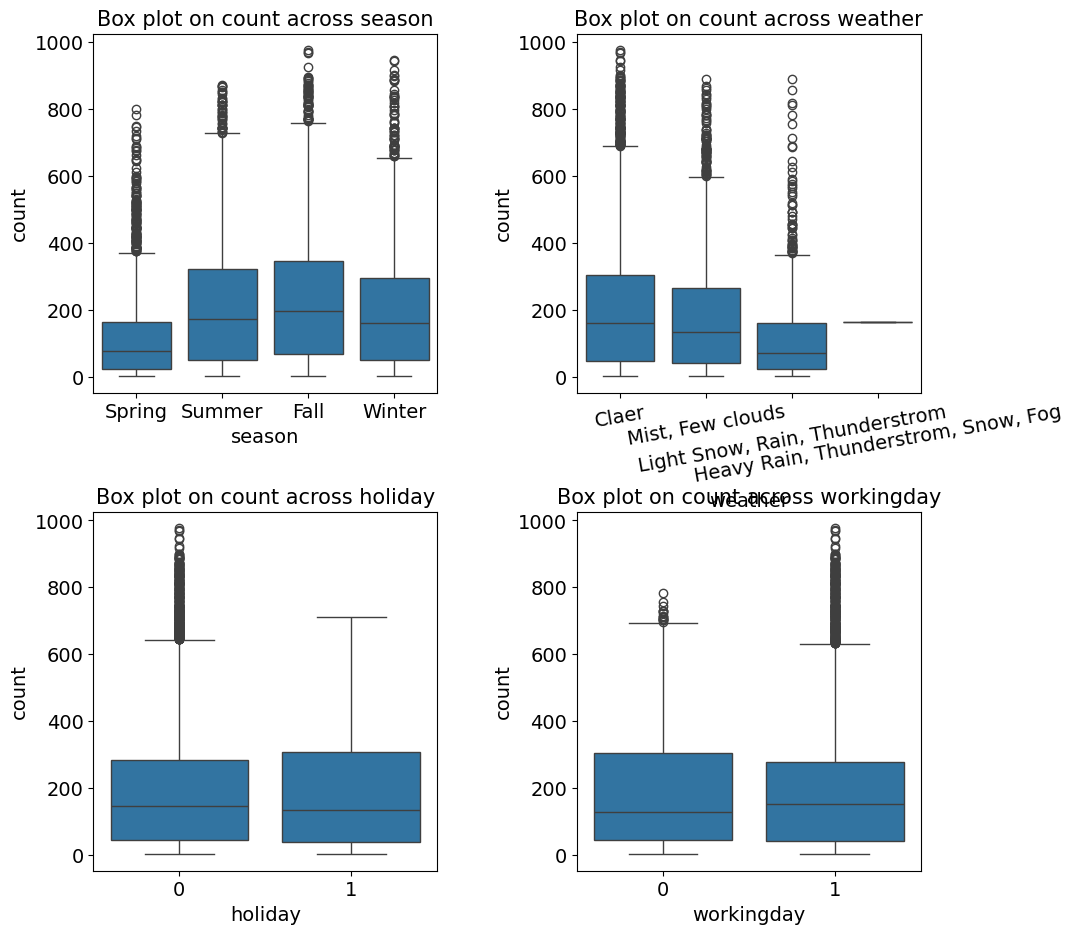

In [ ]:
# Step 1. Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

# Step 2. 서브플롯 할당
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y= 'count', data=train, ax=axes[1, 1])

# Step 3. 세부설정
axes[0, 0].set(title='Box plot on count across season')
axes[0, 1].set(title='Box plot on count across weather')
axes[1, 0].set(title='Box plot on count across holiday')
axes[1, 1].set(title='Box plot on count across workingday')

axes[0, 1].tick_params(axis='x', labelrotation=10)

**분석**
- '계절별 대여 수량'
    - 봄에 가장 적고, 가을에 가장 많다.
- '날씨별 대여 수량'
    - 좋을 때 가장 많고, 안 좋을수록 수량이 적다. 우리의 직관과 일치한다.
- '공휴일별 대여 수량'
    - 0: 공휴일 아님, 1: 공휴일
    - 자전거 대여 수량의 중앙값은 거의 비슷하나, 공휴일이 아닐 때 이상치가 많다.
- '근무일 대여 수량'
    - 0: 근무일 아님, 1: 근무일
    - 근무일일 때, 이상치가 많다.

#### 포인트플롯
범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 점과 선으로 표시한다. 한 화면에 여러 그래프를 그려 서료 비교하기에 적합하다.

**To-do**
- 계절, 날씨, 공휴일, 요일, 근무일(범주형 데이터)별 평균 대여 수량(수치형 데이터)을 포인트플롯으로 나타낸다.

<Axes: xlabel='hour', ylabel='count'>

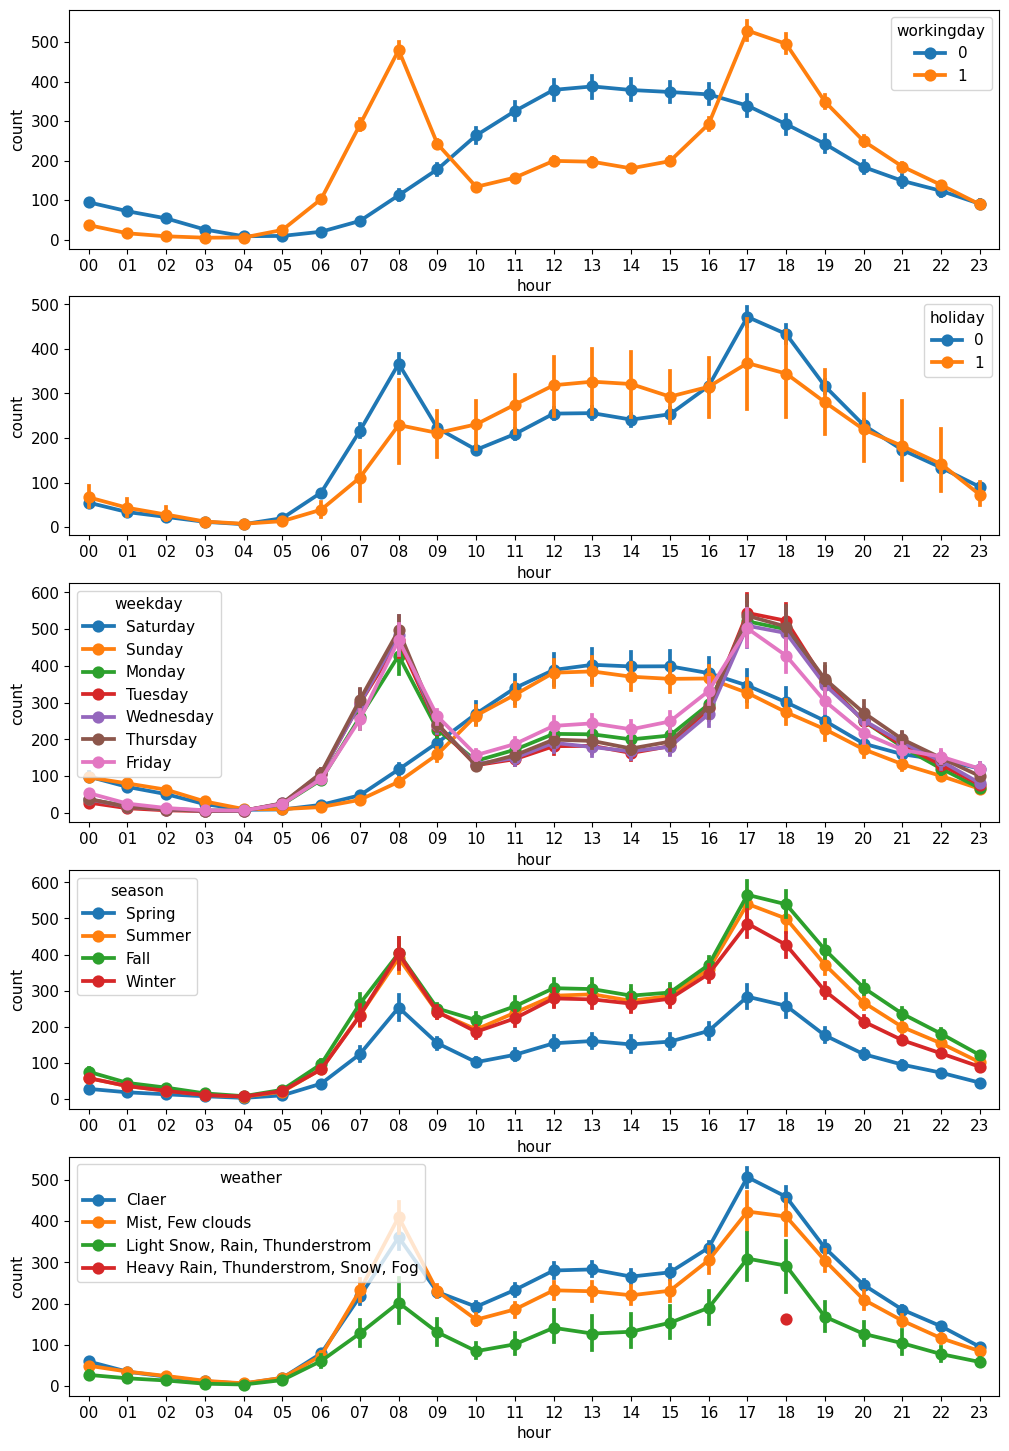

In [ ]:
# Step 1. Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

# Step 2. 서브플롯 할당
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0]) # hue: 비교하고 싶은 피처 전달
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

**분석**
- 근무일에는 출퇴근 시간에 대여 수량이 많고, 쉬는 날에는 오후 12 ~ 2시가 가장 많다.
- 공휴일, 요일에 따른 플롯도 근무일 여부에 따른 포인트플롯과 비슷한 양상을 보인다.
- 가을에 가장 많이 대여하고, 봄에 가장 적게한다.
- 날씨가 좋을 때, 대여량이 가장 많다.
    - 폭우, 폭설 때 대여 건수가 있다. 이러한 이상치는 제거를 고려해보자.

#### 회귀선을 포함한 산점도 그래프
수치형 데이터 간 상관관계를 파악하는데 사용한다.

**To-do**

온도, 체감 온도, 풍속, 습도별 대여 수량을 그려본다.

**Funtions**

regplot()
- scatter_kws={'alpha': 0.2}
    - 산점도 그래프에 찍히는 점의 투명도를 조절한다.
    
- line_kws={'color': 'blue'}
    - 회귀선의 색상을 선택한다.

<Axes: xlabel='humidity', ylabel='count'>

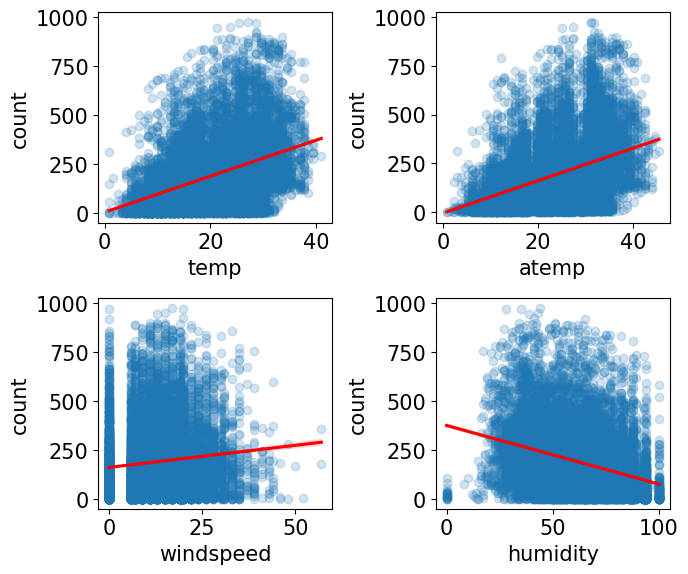

In [ ]:
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7, 6)

sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})

**분석**
- 온도와 체감 온도가 높을수록 대여 수량이 많다.
- 습도는 낮을수록 대여 수량이 많다.
- 풍속이 셀수록 대여 수량이 많다.
    - 자세히 보면 풍속이 0인 데이터가 많다. 관측치가 없거나 오류로 인해 기록됐을 가능성이 높다.
    - 결측값이 많이 존재하므로 그래프를 통해 풍속과 대여 수량의 상관관계를 파악하기 힘들다. 결측값을 다른 값으로 대체하거나 windspeed 피처 자체를 삭제하는 방향으로 생각하자.

#### 히트맵
데이터 간 관계를 색상으로 표현하여, 여러 데이터를 한눈에 비교하기 좋다.

**To-do**
수치형 데이터들의 상관관계를 확인해본다.

**Function**
- corr()
    - DataFrame 내의 피처 간 상관계수를 계산해 반환한다.

In [ ]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


<Axes: >

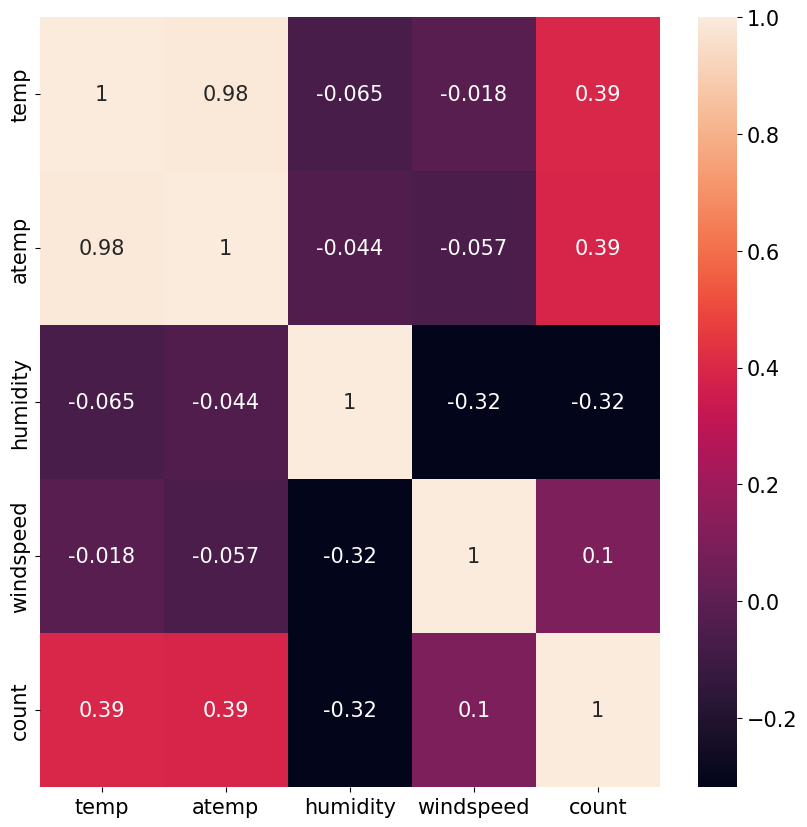

In [ ]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

sns.heatmap(corrMat, annot=True) # annot=True -> 상관계수가 숫자로 표시한다.

**분석**
- temp와 count 간 상관계수는 0.39 즉, 양의 상관관계를 보인다.
    - 온도가 높을수록 수량이 많다.
- humidity와 count는 음의 상관관계를 보인다.
    - 습도가 낮을수록 수량이 많다.
- windspeed는 상관관계가 매우 약하므로, 제거하는 편이 좋다.

## 베이스라인 모델

In [ ]:
import pandas as pd

data_path = '/content/drive/MyDrive/Kaggle/Bike_Sharing_Demand/data/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

### 피처 엔지니어링

데이터를 변환하는 작업으로, 일반적으로 훈련 데이터와 테스트 테이터에 공통으로 반영하기 위해 피처 엔지니어링 전에 두 데이터를 합쳤다가 끝나면 다시 나눠준다.

#### 이상치 제거

In [ ]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

#### 데이터 합치기

In [ ]:
all_data = pd.concat([train, test], ignore_index=True) # 원래의 인덱스를 무시하고 이어붙인다.
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


테스트 데이터에 casual, registerd 피처와 count 타깃값이 없으므로 NaN으로 표시되어 있다.

#### 파생 피처 추가

In [ ]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])

# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])

# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])

# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])

# 요일 피처 생성
all_data['weekday'] = all_data['date'].apply(lambda dateString: datetime.strptime(dateString, "%Y-%m-%d").weekday())

#### 필요 없는 피처 제거

- casual, registered: 테스트 데이터에 없는 피처
- datetime: 인덱스 역할
- date: year, month, day가 정보를 이미 담고 있음
- month: season 피처가 대분류 성격임
- windspeed: 타깃값과 상관관계가 약함

In [ ]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)

#### 데이터 나누기

In [ ]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

### 평가지표 계산 함수 작성

In [ ]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    """
    [매개변수]
    y_true: 실제 타깃값
    y_pred: 예측값
    convertExp: 입력 데이터를 지수변환할지를 정하는 파라미터
    """
    # 지수변환
    # 지수변환하는 이유는 타깃값으로 count가 아닌 log(count)를 사용하기 때문이다.
    # 타깃값이 정규분포를 따른다면 타깃값을 그대로 사용해도 된다.
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true + 1))
    log_pred = np.nan_to_num(np.log(y_pred + 1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred) ** 2))
    return output

### 모델 훈련

**선형 회귀 모델 훈련**
독립변수(피처)인 X_train과 종속변수(타깃값)인 log_y에 대응하는 최적의 선형 회귀 계수를 구하는 것

𝐘 = Θ𝟢 + Θ𝟷𝒳𝟷 + Θ𝟤𝒳𝟤 + Θ𝟥𝒳𝟥

- 학습: 독립변수 𝒳와 종속변수 𝐘를 활용하여 최적의 선형 회귀계수 Θ를 구하는 과정

- 예측: 회귀계수 Θ를 아는 상태에서 새로운 독립변수 𝒳가 주어질 때, 종속변수 𝐘를 구하는 과정

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [ ]:
log_y = np.log(y) # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

### 모델 성능 검증

In [ ]:
preds = linear_reg_model.predict(X_train)

In [ ]:
print(f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형 회귀의 RMSLE 값 : 1.0205


학습에 사용했던 데이터로 예측을 하는 것은 옳지 않다.

### 예측 및 결과 제출

**주의 사항**
1. 테스트 데이터로 예측한 결과를 이용해야 한다.
2. 타깃값을 log변환 했을 경우, 예측한 값에 지수변화을 해줘야 한다.

In [ ]:
linearreg_preds = linear_reg_model.predict(X_test)

submission['count'] = np.exp(linearreg_preds)
submission.to_csv('submission.csv', index=False)

## 성능 개선 1: 릿지 회귀 모델

릿지(ridge) 회귀 모델은 L2 규제를 적용한 선형 회귀 모델이다.
- 규제(Regularization): 모델이 훈련 데이터에 과대적합되지 않도록 해주는 방법
- 중요한 파라미터는 alpha로, 값이 클수록 규제 강도가 강해진다.

*릿지 회귀 모델은 성능이 좋은 편은 아니다.*

In [1]:
import pandas as pd

data_path = '/content/drive/MyDrive/Kaggle/Bike_Sharing_Demand/data/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

### 피처 엔지니어링

데이터를 변환하는 작업으로, 일반적으로 훈련 데이터와 테스트 테이터에 공통으로 반영하기 위해 피처 엔지니어링 전에 두 데이터를 합쳤다가 끝나면 다시 나눠준다.

#### 이상치 제거

In [2]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

#### 데이터 합치기

In [3]:
all_data = pd.concat([train, test], ignore_index=True) # 원래의 인덱스를 무시하고 이어붙인다.
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


테스트 데이터에 casual, registerd 피처와 count 타깃값이 없으므로 NaN으로 표시되어 있다.

#### 파생 피처 추가

In [4]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])

# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])

# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])

# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])

# 요일 피처 생성
all_data['weekday'] = all_data['date'].apply(lambda dateString: datetime.strptime(dateString, "%Y-%m-%d").weekday())

#### 필요 없는 피처 제거

- casual, registered: 테스트 데이터에 없는 피처
- datetime: 인덱스 역할
- date: year, month, day가 정보를 이미 담고 있음
- month: season 피처가 대분류 성격임
- windspeed: 타깃값과 상관관계가 약함

In [5]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)

#### 데이터 나누기

In [6]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

### 평가지표 계산 함수 작성

In [7]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    """
    [매개변수]
    y_true: 실제 타깃값
    y_pred: 예측값
    convertExp: 입력 데이터를 지수변환할지를 정하는 파라미터
    """
    # 지수변환
    # 지수변환하는 이유는 타깃값으로 count가 아닌 log(count)를 사용하기 때문이다.
    # 타깃값이 정규분포를 따른다면 타깃값을 그대로 사용해도 된다.
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true + 1))
    log_pred = np.nan_to_num(np.log(y_pred + 1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred) ** 2))
    return output

### 하피퍼파라미터 최적화(모델 훈련)

**To-do**

그리드서치 기법을 사용
- 하이퍼파라미터를 격자처럼 촘촘하게 순회하며 하이퍼파라미터를 찾는 기법
- 데이터가 많고 복잡한 모델을 사용하면 수행 시간이 상당히 길어진다.

#### 모델 생성

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

#### 그리드서치 객체 생성

- estimator: 분류 및 회귀 모델
- param_grid: 딕셔너리 형태로 모델의 하이퍼파라미터명과 여러 하이퍼파라미터 값을 지정
- scoring: 평가지표
    - 별도로 만든 평가지표를 사용해도 됨
    - metrics.make_scorer
        - 평가지표 계산 함수와 평가지표 점수가 높으면 좋은지 여부 등을 인수로 받는 교차 검증용 평가 함수
- cv: 교차 검증 분할 개수
    - 기본값: 5


In [9]:
# 하이퍼파라미터 값 목록
ridge_params = {'max_iter': [3000], 'alpha': [0.1, 1, 2, 3, 4, 10 ,30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 그리드서치 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,
                                      param_grid=ridge_params,
                                      scoring=rmsle_scorer,
                                      cv=5)

#### 그리드서치 수행

In [10]:
log_y = np.log(y)
gridsearch_ridge_model.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [11]:
print(f'최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


### 성능 검증

In [12]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train) # best_estimator_ 속성에 최적 예측기가 저장되어 있다.
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds):.4f}')

릿지 회귀 RMSLE 값 : 1.0205


## 성능 개선 2: 라쏘 회귀 모델

*릿지 모델과 마찬가지로 성능이 좋은 편은 아니다.*

### 하이퍼파라미터 최적화(모델 훈련)

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_alpha = 1 / np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter': [3000], 'alpha': lasso_alpha}

gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)

In [ ]:
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


### 성능 검증

In [ ]:
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


## 성능 개선 3: 랜덤 포레스트 회귀 모델

### 하이퍼파라미터 최적화(모델 훈련)

In [13]:
from sklearn.ensemble import RandomForestRegressor

randomforest_model = RandomForestRegressor()

rf_params = {'random_state': [42], 'n_estimators': [100, 120, 140]}
gridsearch_rf_model = GridSearchCV(estimator=randomforest_model,
                                   param_grid=rf_params,
                                   scoring=rmsle_scorer,
                                   cv=5)

log_y = np.log(y)
gridsearch_rf_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_rf_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


### 모델 성능 검증

In [14]:
preds = gridsearch_rf_model.best_estimator_.predict(X_train)
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1127


### 예측 및 결과 제출

- 성능 측정을 훈련 데이터로 했기 때문에 테스트 데이터에서도 성능이 좋다고 보장될 수 없다.
- 두 데이터의 분포를 확인해보고, 분포가 비슷하다면 과대적합 문제가 상대적으로 적기 때문에 테스트 데이터에서도 성능이 좋을 가능성이 크다.

**To-do**

훈련 데이터 타깃값과 테스트 데이터 타깃 예측값의 분포를 살펴본다. histplot()

Text(0.5, 1.0, 'Predicted test data distribution')

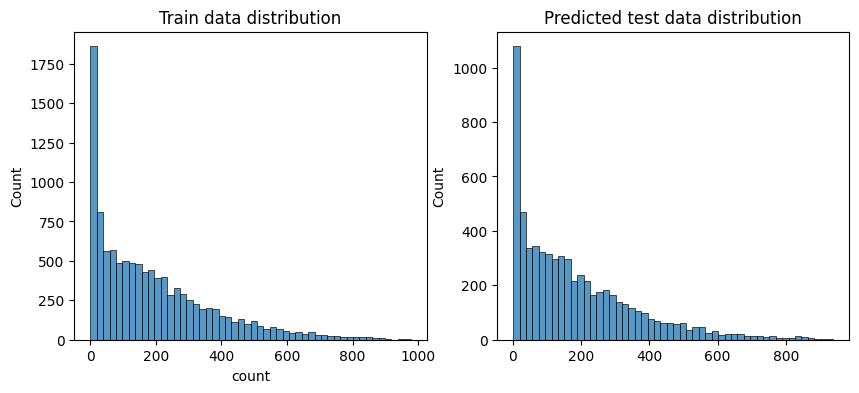

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

rf_preds = gridsearch_rf_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train data distribution')

sns.histplot(np.exp(rf_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted test data distribution')

In [16]:
submission['count'] = np.exp(rf_preds)
submission.to_csv('submission.csv', index=False)